# 1st experiment

## TODO 
1. read the code: understand it
2. do the similar process with your dataset




In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# importing libs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# loading the data only needed the 1st time
# from google.colab import files
# uploaded = files.upload()

In [2]:
df = pd.read_excel('https://github.com/TanishSurana/ML-data/blob/main/Data_Train%20(1).xlsx')

XLRDError: ignored

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Basic exploration

In [ ]:
df.index

RangeIndex(start=0, stop=6019, step=1)

In [ ]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
df.shape

(6019, 12)

In [ ]:
df.size

72228

In [ ]:
df.ndim

2

In [ ]:
df.memory_usage()

Index                  128
Name                 48152
Location             48152
Year                 48152
Kilometers_Driven    48152
Fuel_Type            48152
Transmission         48152
Owner_Type           48152
Mileage              48152
Engine               48152
Power                48152
Seats                48152
Price                48152
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of                                   Name    Location  ...  Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...    5.0   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...    5.0  12.50
2                         Honda Jazz V     Chennai  ...    5.0   4.50
3                    Maruti Ertiga VDI     Chennai  ...    7.0   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...    5.0  17.74
...                                ...         ...  ...    ...    ...
6014                  Maruti Swift VDI       Delhi  ...    5.0   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...    5.0   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...    8.0   2.90
6017                Maruti Wagon R VXI     Kolkata  ...    5.0   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...    5.0   2.50

[6019 rows x 12 columns]>

In [ ]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

### Removing the units


In [ ]:
df['Mileage']= df.Mileage.str.replace('km/kg','').str.replace('kmpl','').astype(float)

df['Engine']= df.Engine.str.replace('CC','').astype(float)

df['Power']= df.Power.str.replace(' bhp','')

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


### checking the unique and null values

In [ ]:
df.isnull().sum() #how many rows are null in each col

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

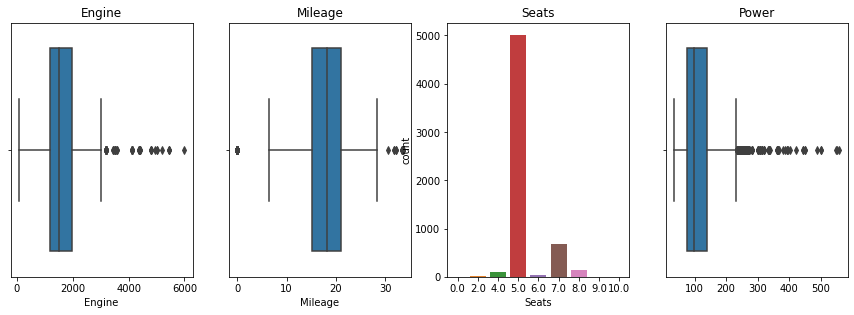

In [ ]:
# seeing the spread of dataset for null rows
plt.figure(figsize=(15,15))
plt.subplots_adjust(left = 0.125,bottom=0.1, right =0.9, top=0.9,wspace=0.2 ,hspace=0.2)

plt.subplot(341)
plt.title('Engine')
sns.boxplot('Engine',data=df)


plt.subplot(342)
plt.title('Mileage')
sns.boxplot('Mileage',data=df)


plt.subplot(343)
plt.title('Seats')
sns.countplot(df['Seats'])

plt.subplot(344)
plt.title('Power')
df.loc[df['Power']=='null','Power']=np.nan # its written null instead of values being null

power=df['Power'][df['Power'].isnull()==False].astype(float).values # converting rest of the values to float
sns.boxplot(power)

**For null values in**

* power: has a lot of outlier of filling it will mode

* seats: can be filled with mode (mean would give decimal values)

* milage: can be filled with mean (fewer null values)

* engines: can be filled with mode (has a lot out outliers) 


In [ ]:
# filling the null values
modes = df.mode(axis=0)

power_mode = float(modes.loc[0,'Power'])
seat_mode = int(modes.loc[0,'Seats'])
mileage_mean = float(df['Mileage'].mean())
engine_mode = float(modes.loc[0,'Engine'])

print(power_mode, seat_mode, mileage_mean, engine_mode)

df['Power'].fillna(power_mode, inplace=True)
df['Seats'].fillna(seat_mode, inplace=True)
df['Mileage'].fillna(mileage_mean, inplace=True)
df['Engine'].fillna(engine_mode, inplace=True)




74.0 5 18.134960943992073 1197.0


In [ ]:
# checking if the null values got filled

df.isnull().sum() #how many rows are null in each col

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Now all the null values are filled with appropriate values

In [ ]:
# printing the head and tail

df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.2,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.1,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.6,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74,5.0,1.95


In [ ]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,2.50


## End of lab 1

# Experiment 2

Todo

*   explore dataset using different plots
*   find the spread of data
* draw boxplot to identify ourliers
* remove outliers from dataset
* display the boxplot without outliers



## Some preprocessing: 

getting the brand and carname from name column

In [ ]:
  # splitting the name col into brand and carname

brand=df.Name.str.split(' ').apply(lambda x : x[0])
carname=df.Name.str.split(' ').apply(lambda x :x[1])

brand=pd.Series(brand,name='brand')
carname=pd.Series(carname,name='carname')

df=pd.concat([df,brand, carname],axis=1)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand,carname
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74,Audi,A4


## Exploring Dataset with various plots and Finding the spread of data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


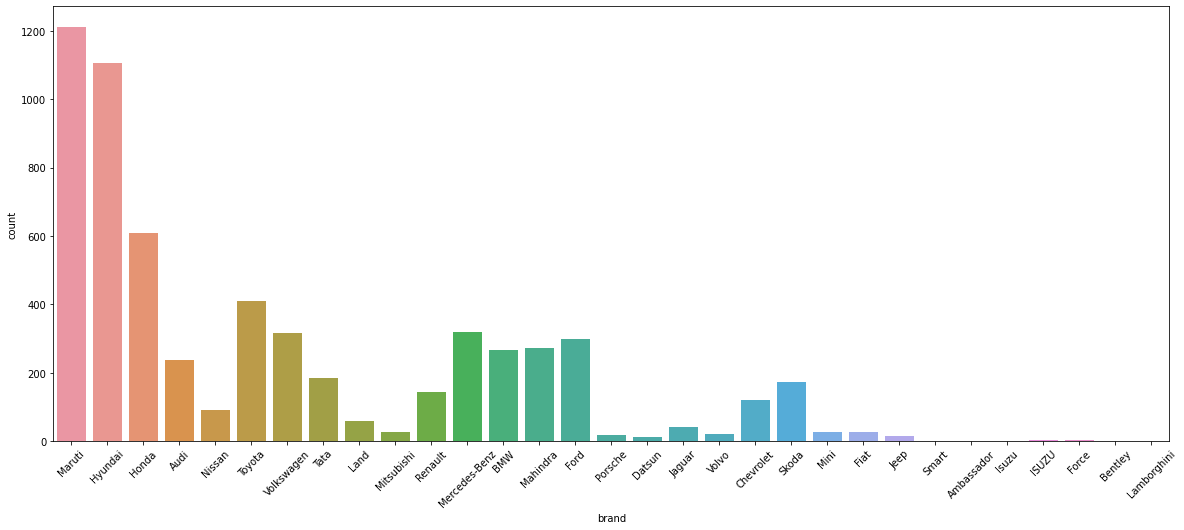

In [ ]:
# count plot of car name

plt.figure(figsize=(20,8))
carplot=sns.countplot(df['brand'])
carplot.set_xticklabels(carplot.get_xticklabels(), rotation=45)
plt.show()

**Spread of data**

Here you can see that most of the cars are from maruti, hyundai, honda, toyota, etc and very few are from the luxury brands or brands that are not popular in India .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


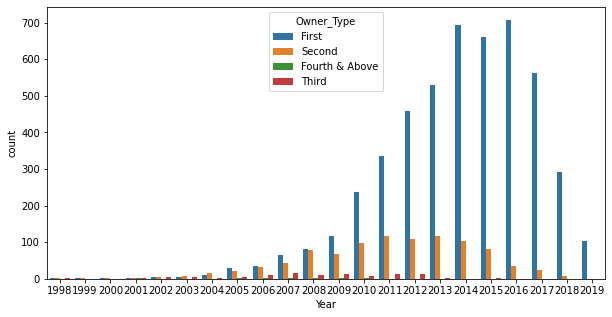

In [ ]:
# count plot of year grouped by owners

plt.figure(figsize=(10,5))
sns.countplot(df["Year"],hue=df['Owner_Type'])
plt.show()

**Spread of data**

* We can see that all of them are normal distribution (little bit left skewed)
* Also, that mean/peak of the distribution of 1st owner type is ahead of peak of 2nd owner, and similarly between 2nd and 3rd owner types.
* This makes sense as a owner will atleast use it for few years before selling it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


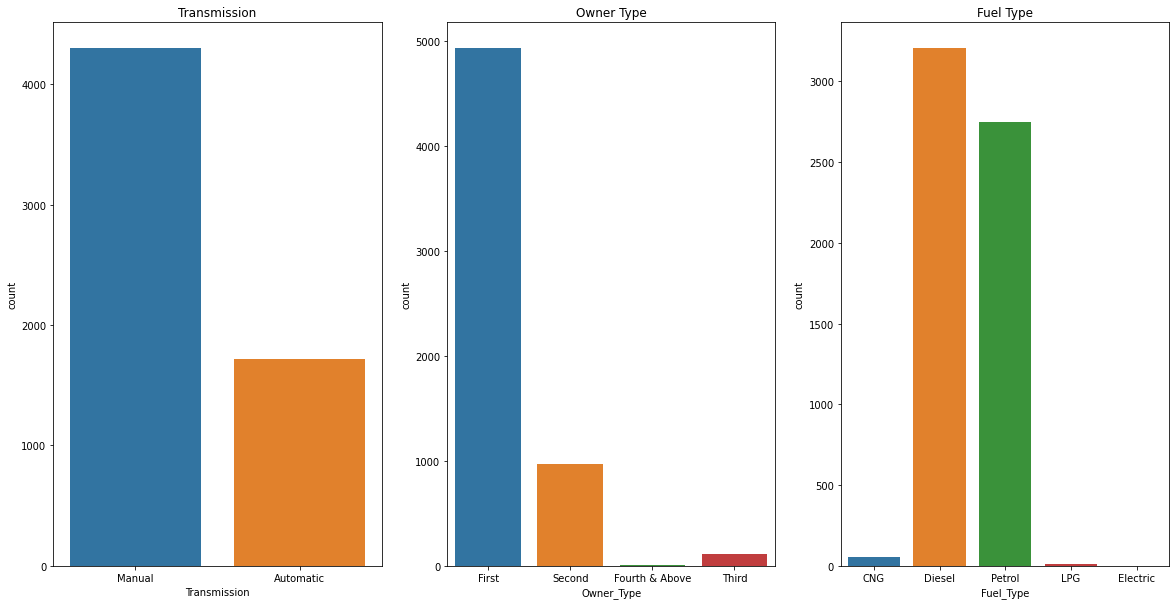

In [ ]:
# subplots

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title("Transmission")
sns.countplot(df['Transmission'])

plt.subplot(132)
plt.title("Owner Type")
sns.countplot(df['Owner_Type'])


plt.subplot(133)
plt.title('Fuel Type')
sns.countplot(df['Fuel_Type'])


**Spread of data**

Transmission:

> more than 70% of the cars are of type manual

Owner Type

> Most of the owner are First owners (more than 80%)

Fuel Type

> Most of the cars are of type Diesel and Petrol







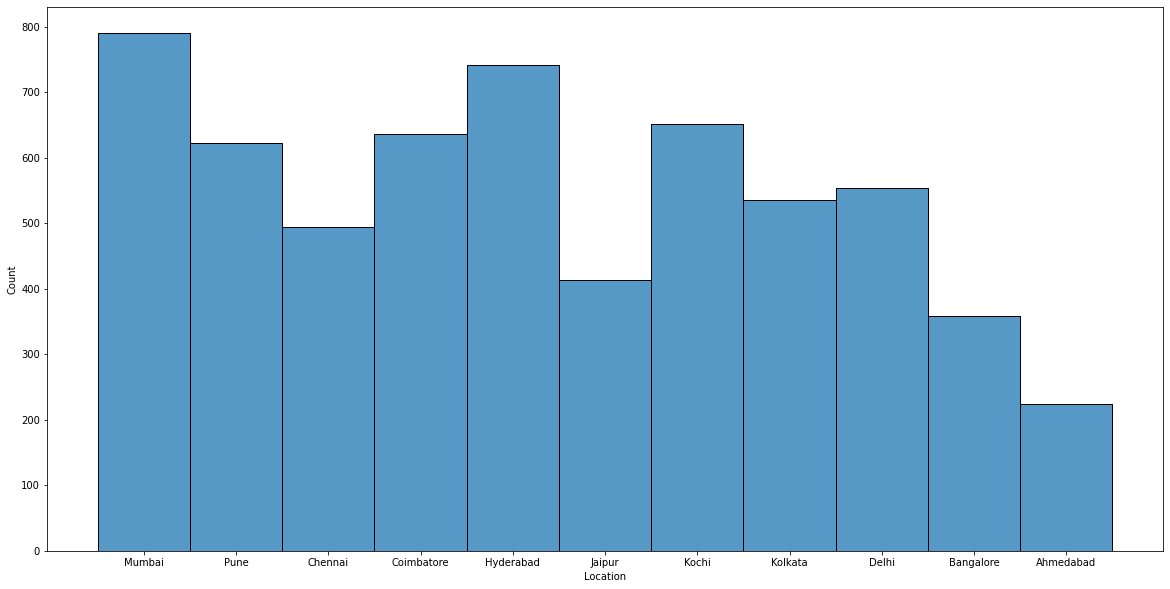

In [ ]:
# histogram
plt.figure(figsize=(20,10))
sns.histplot(df['Location'])
plt.show()

**Spread of data**

There is no proper spread wrt to city, but Mumbai has the highest number of cars and Ahmendabad has the lowest.

## Finding outliers using boxplot and violin plot



In [ ]:
df["Power"] = df["Power"].astype(float)

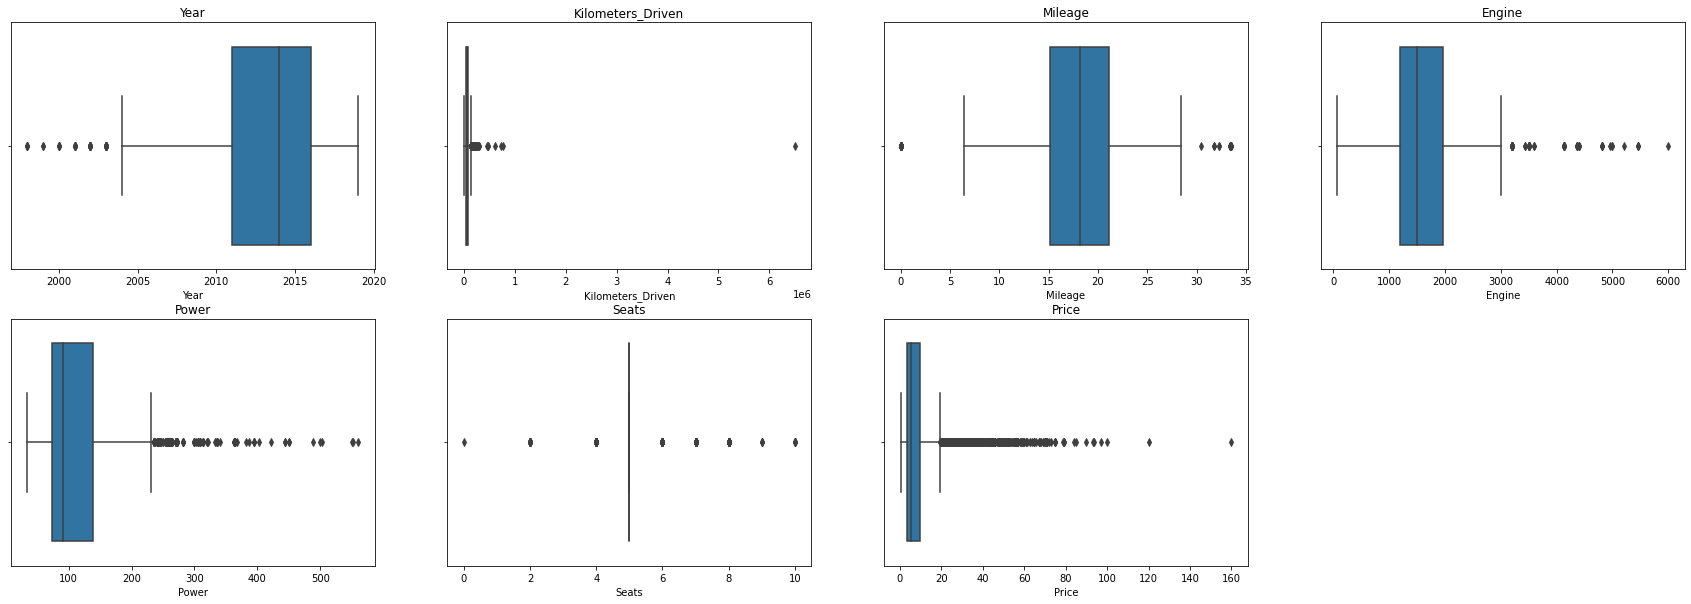

In [ ]:
# seeing the spread of dataset for null rows

# converting power from object type to float

plt.figure(figsize=(30,10))

plt.subplot(241)
plt.title('Year')
sns.boxplot(x='Year',data=df)

plt.subplot(242)
plt.title('Kilometers_Driven')
sns.boxplot(x='Kilometers_Driven',data=df)

plt.subplot(243)
plt.title('Mileage')
sns.boxplot(x='Mileage',data=df)

plt.subplot(244)
plt.title('Engine')
sns.boxplot(x='Engine',data=df)

plt.subplot(245)
plt.title('Power')
sns.boxplot(x='Power',data=df)

plt.subplot(246)
plt.title('Seats')
sns.boxplot(x='Seats',data=df)

plt.subplot(247)
plt.title('Price')
sns.boxplot(x='Price',data=df)


plt.show()


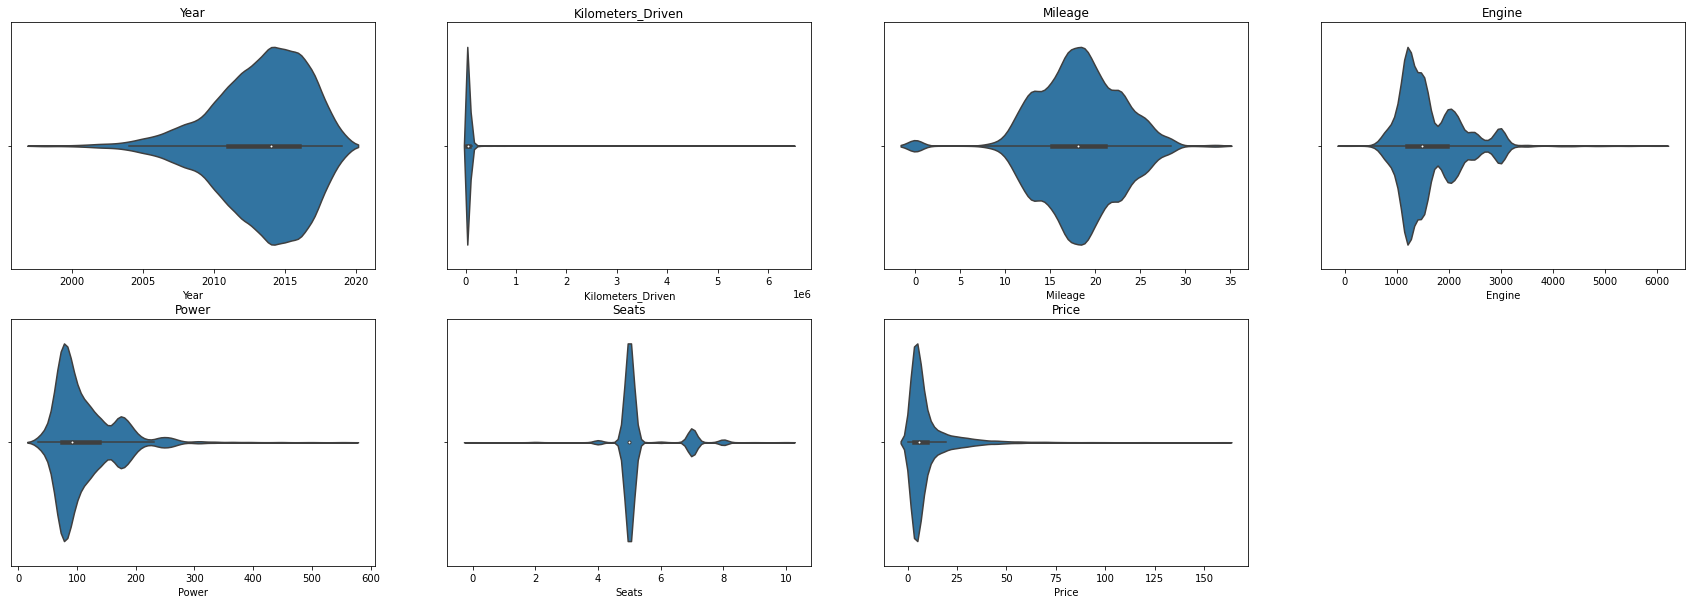

In [ ]:
# seeing the spread of dataset for null rows

# converting power from object type to float

plt.figure(figsize=(30,10))

plt.subplot(241)
plt.title('Year')
sns.violinplot(x='Year',data=df)

plt.subplot(242)
plt.title('Kilometers_Driven')
sns.violinplot(x='Kilometers_Driven',data=df)

plt.subplot(243)
plt.title('Mileage')
sns.violinplot(x='Mileage',data=df)

plt.subplot(244)
plt.title('Engine')
sns.violinplot(x='Engine',data=df)

plt.subplot(245)
plt.title('Power')
sns.violinplot(x='Power',data=df)

plt.subplot(246)
plt.title('Seats')
sns.violinplot(x='Seats',data=df)

plt.subplot(247)
plt.title('Price')
sns.violinplot(x='Price',data=df)


plt.show()


## Removing the outliers

In [ ]:
# calculating iqr for each variable

litt = [
        'Year',
        'Kilometers_Driven',
        'Mileage',
        'Engine',
        'Power', 
        'Price'
        ]

for col in litt:
  q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
  iqr = q75 - q25
  upper = q75 + iqr*1.5
  lower = q25 - iqr*1.5
  print(upper, lower, col)


  df = df[~(df[col]>upper)]
  df = df[~(df[col]<lower)]
  print(df.shape)

df = df[~(df['Seats']>8)]
df = df[~(df['Seats']<3)]


print(df)

  
  



2023.5 2003.5 Year
(5969, 14)
130618.5 -24377.5 Kilometers_Driven
(5767, 14)
29.650000000000002 6.85 Mileage
(5695, 14)
3124.5 40.5 Engine
(5638, 14)
234.075 -22.045 Power
(5446, 14)
17.25 -4.75 Price
(4839, 14)
                                  Name   Location  ...      brand  carname
0               Maruti Wagon R LXI CNG     Mumbai  ...     Maruti    Wagon
1     Hyundai Creta 1.6 CRDi SX Option       Pune  ...    Hyundai    Creta
2                         Honda Jazz V    Chennai  ...      Honda     Jazz
3                    Maruti Ertiga VDI    Chennai  ...     Maruti   Ertiga
5      Hyundai EON LPG Era Plus Option  Hyderabad  ...    Hyundai      EON
...                                ...        ...  ...        ...      ...
6014                  Maruti Swift VDI      Delhi  ...     Maruti    Swift
6015          Hyundai Xcent 1.1 CRDi S     Jaipur  ...    Hyundai    Xcent
6016             Mahindra Xylo D4 BSIV     Jaipur  ...   Mahindra     Xylo
6017                Maruti Wagon R VXI

In [ ]:
df.Mileage.describe()

count    4834.000000
mean       18.987807
std         3.946526
min         8.700000
25%        16.470000
50%        18.900000
75%        21.900000
max        28.400000
Name: Mileage, dtype: float64

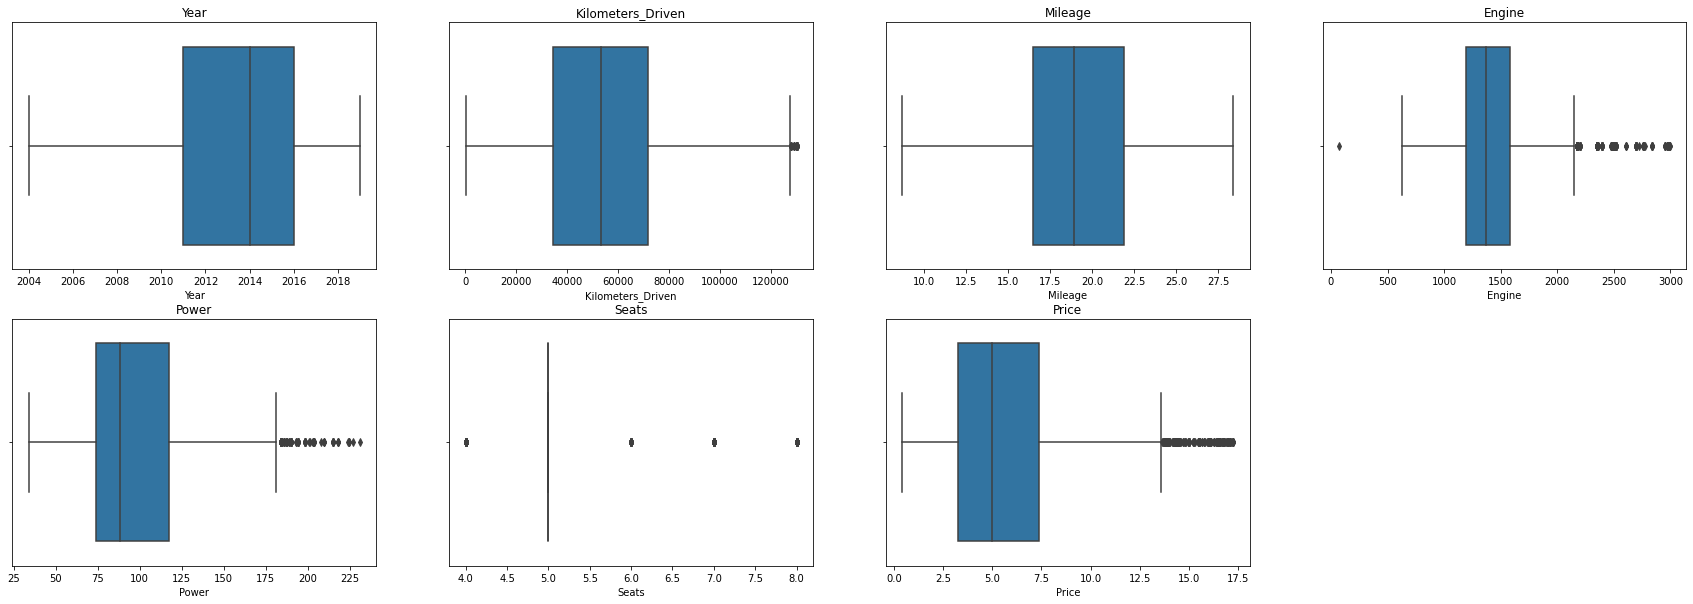

In [ ]:
# plotting them back

plt.figure(figsize=(30,10))

plt.subplot(241)
plt.title('Year')
sns.boxplot(x='Year',data=df)

plt.subplot(242)
plt.title('Kilometers_Driven')
sns.boxplot(x='Kilometers_Driven',data=df)

plt.subplot(243)
plt.title('Mileage')
sns.boxplot(x='Mileage',data=df)

plt.subplot(244)
plt.title('Engine')
sns.boxplot(x='Engine',data=df)

plt.subplot(245)
plt.title('Power')
sns.boxplot(x='Power',data=df)

plt.subplot(246)
plt.title('Seats')
sns.boxplot(x='Seats',data=df)

plt.subplot(247)
plt.title('Price')
sns.boxplot(x='Price',data=df)


plt.show()


# Experiment 3

Todo:


*   Normalize the data
* encoding categorical features 
* check for skewness 
* remove skewness using tranforms
* Feature Engineering



In [ ]:
# removing name col:
df.drop(['Name'],axis=1,inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand,carname
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,Hyundai,EON


## Encoding the categorical features

Applying label encoding to all the columns expect Transmission as most the columns has a large number of categories. If we apply one hot to them the a lot of columns will be added to the dataset


In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encoding: location, fuel_type, owner_type, brand, carname
le = LabelEncoder()
litt = [
        'Location', 
        'Fuel_Type', 
        'Owner_Type', 
        'brand',
        'carname'
]

for col in litt:
  df[col] = le.fit_transform(df[col])

# one hot: transmission
trans = pd.get_dummies(df['Transmission'])
df.drop(['Transmission'],axis=1,inplace=True)
df=pd.concat([df,trans], axis=1)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,brand,carname,Automatic,Manual
0,9,2010,72000,0,0,26.60,998.0,58.16,5.0,1.75,13,147,0,1
1,10,2015,41000,1,0,19.67,1582.0,126.20,5.0,12.50,8,39,0,1
2,2,2011,46000,4,0,18.20,1199.0,88.70,5.0,4.50,7,76,0,1
3,2,2012,87000,1,0,20.77,1248.0,88.76,7.0,6.00,13,55,0,1
5,5,2012,75000,3,0,21.10,814.0,55.20,5.0,2.35,8,47,0,1


## normalization of features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f728b1410>,
      dtype=object)

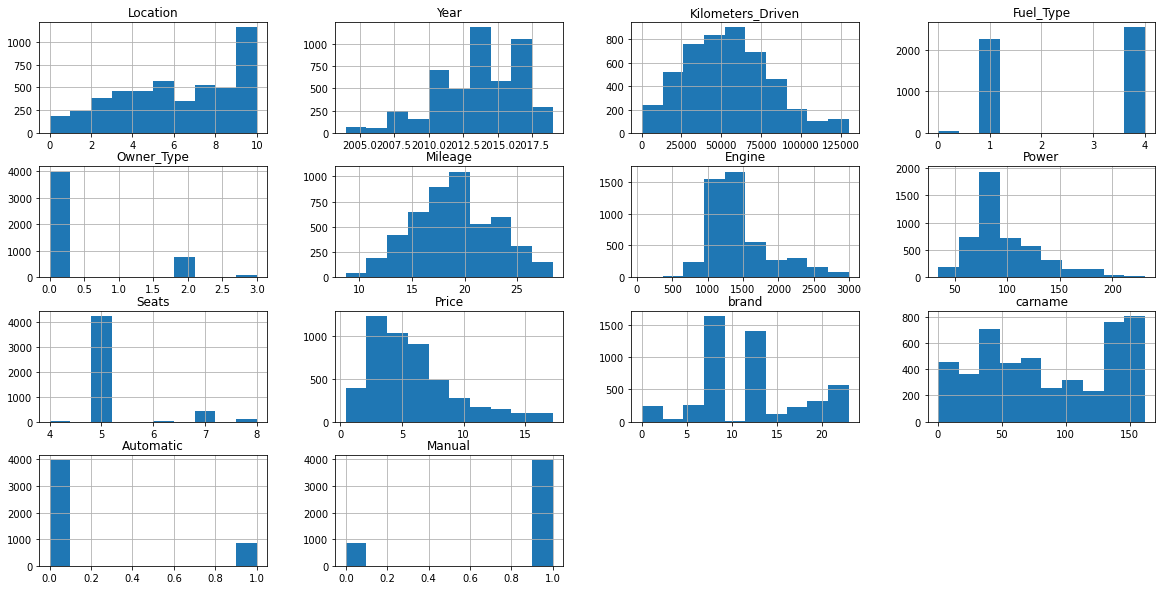

In [ ]:
df.hist(figsize=(20,10))

These are the plots for all the columns before normalizing them. Most the the non-categorical features are already in normal form.

In [ ]:
# normalization
litt = [
        'Kilometers_Driven',
        'Mileage',
        'Engine',
        'Power', 
        ]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df.reset_index(inplace = True)

for col in litt:
  test = pd.DataFrame(scaler.fit_transform(df[[col]]))
  df[col] = test[0]

## checking skewness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

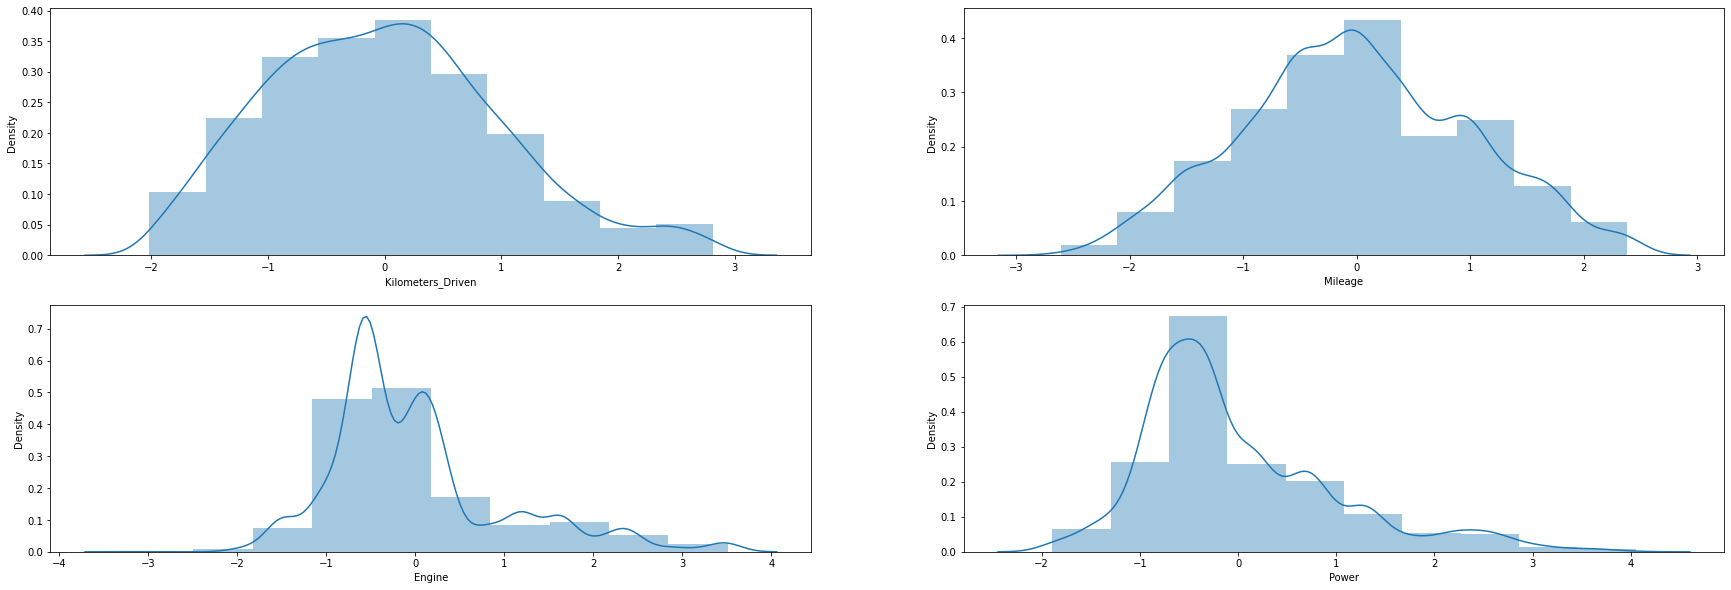

In [ ]:
litt = [
        'Kilometers_Driven',
        'Mileage',
        'Engine',
        'Power', 
        ]

plt.figure(figsize=(30,10))
binss = [10,10,10,10,10]

count = 1
shit = '22'
plt.subplot(221)


for col in litt:
  shit2 = int(shit + str(count))
  plt.subplot(shit2)
  sns.distplot(df[col],bins=binss[count],norm_hist=False,kde=True)
  count += 1

  

all of these are now normalized. Mileage has very little skewness, but other are skewed. So, next we will be tranforming them. Also you can see below the q-q plot its not a straight line for Engine and Power.

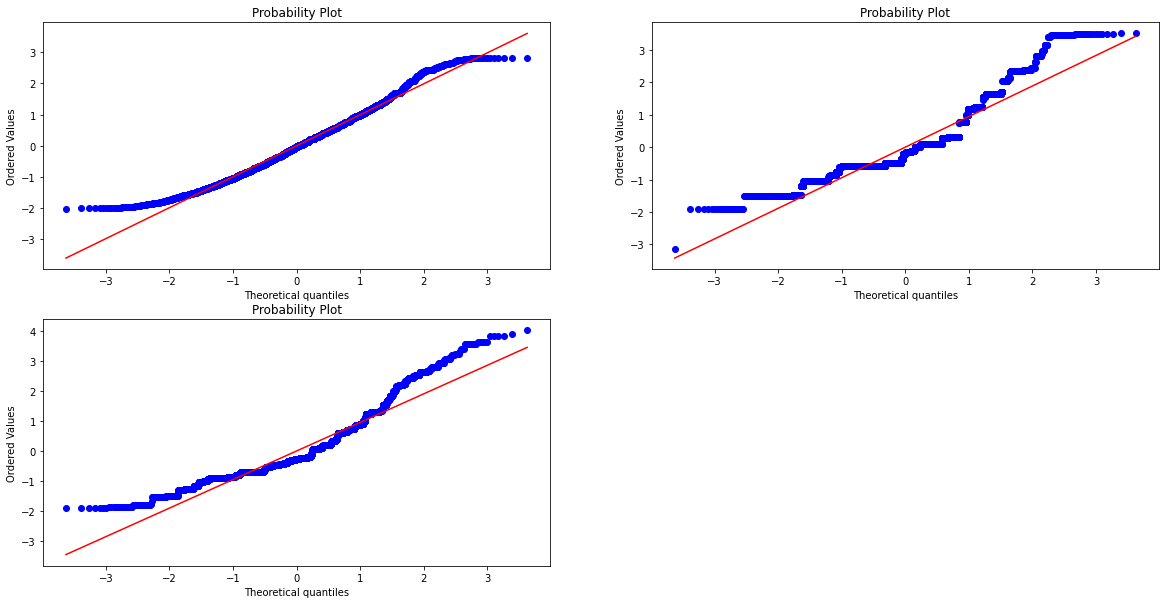

In [ ]:
import pylab
import scipy.stats as stat
litt = [
        'Kilometers_Driven',
        'Engine',
        'Power', 
        ]

count = 1
plt.figure(figsize=(20,10))
shit = '22'

for col in litt:
  shit2 = int(shit + str(count))
  plt.subplot(shit2)
  stat.probplot(df[col],dist='norm', plot=pylab)# this transformation gives considerably straight line in QQ plot
  count += 1


## Transformations

applying transformation of kilometer_driven, Engine and Power, although they are only a little bit skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

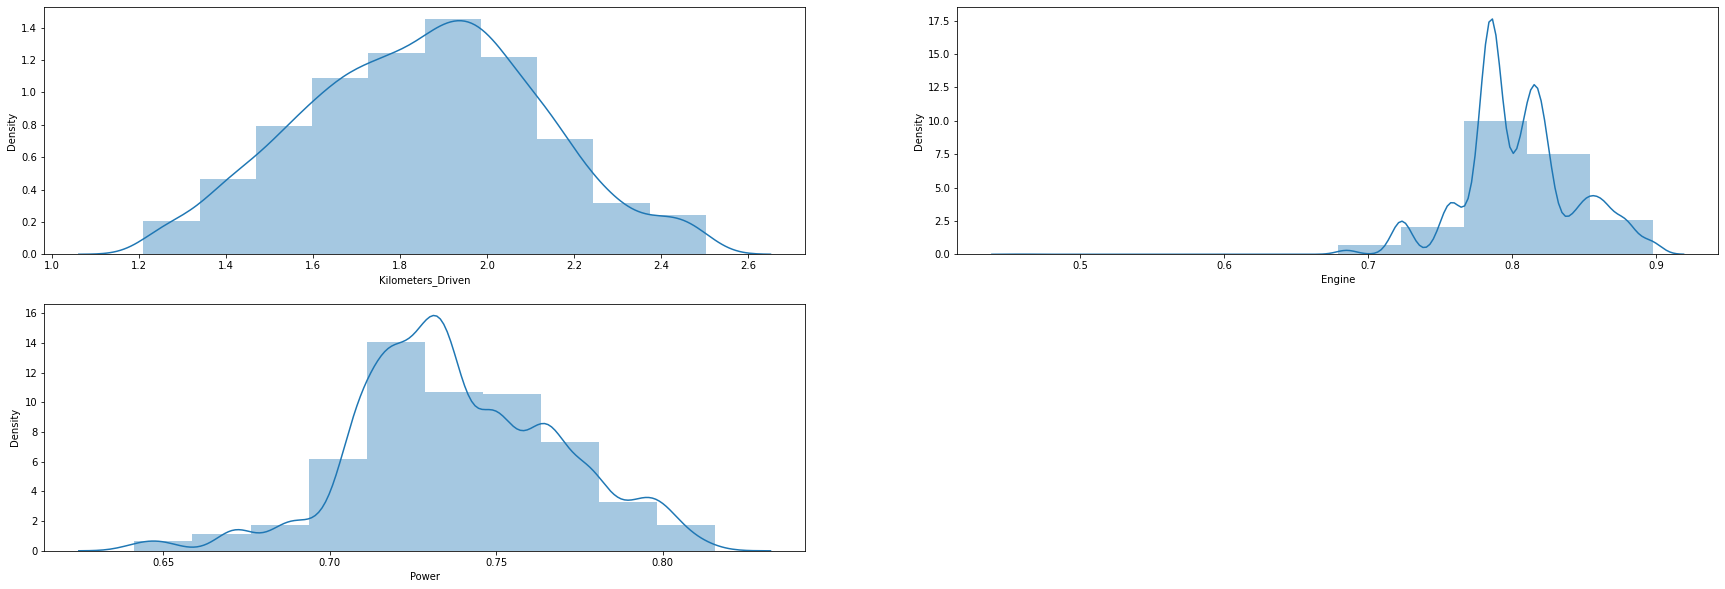

In [ ]:
import scipy.stats as stat

litt = [
        'Kilometers_Driven',
        'Engine',
        'Power', 
        ]

count = 1
plt.figure(figsize=(30,10))
shit = '22'

for col in litt:
  df[col], parameters = stat.boxcox(df[col]+5)
  shit2 = int(shit + str(count))
  plt.subplot(shit2)
  sns.distplot(df[col],bins=binss[count],norm_hist=False,kde=True)
  count += 1



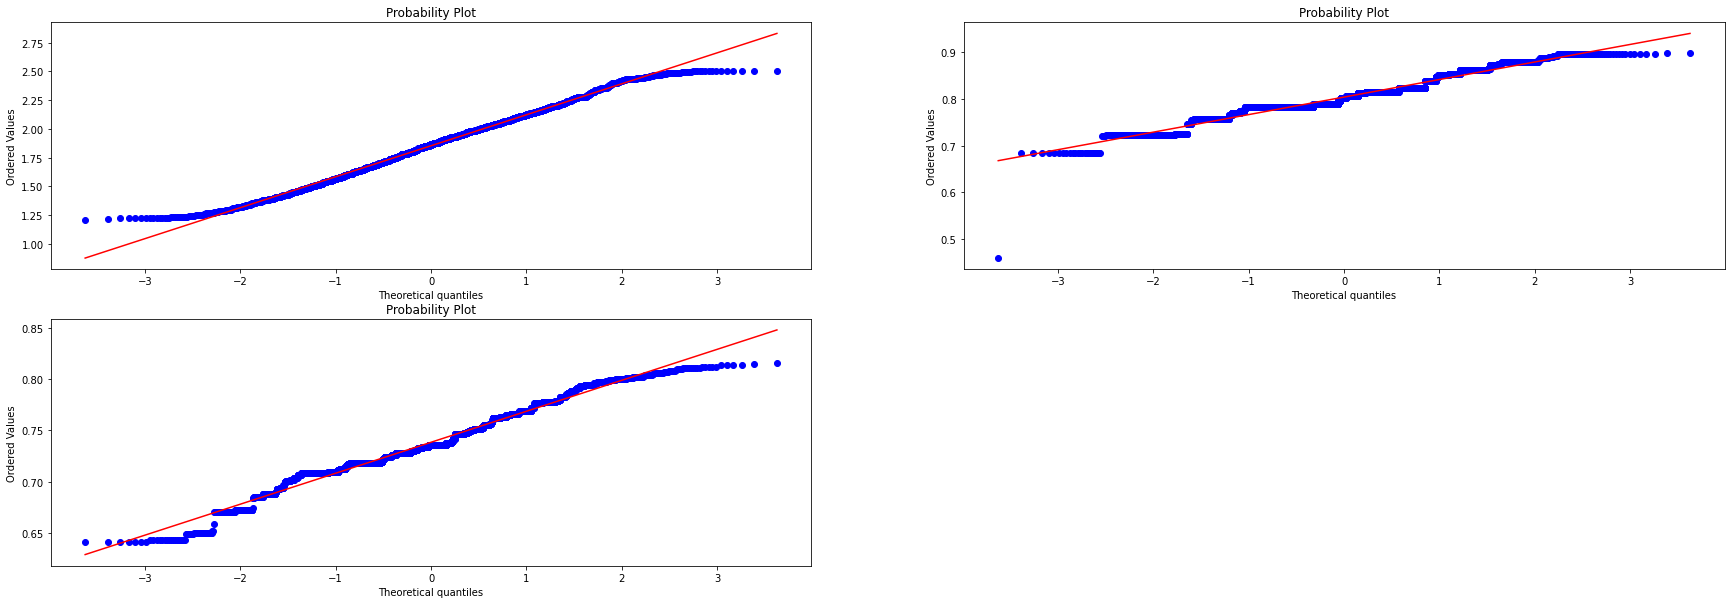

In [ ]:
import pylab

litt = [
        'Kilometers_Driven',
        'Engine',
        'Power', 
        ]

count = 1
plt.figure(figsize=(30,10))
shit = '22'

for col in litt:
  shit2 = int(shit + str(count))
  plt.subplot(shit2)
  stat.probplot(df[col],dist='norm', plot=pylab)# this transformation gives considerably straight line in QQ plot
  count += 1


Now the above three columns are normalized as they follow a line in qq plot

## Feature Engineering

The data contains a "Name" feature which contains the brand name, model name, and the version of the car. But all of this in column so I split the column into two "brand" and "carname" as these are the more important when they are splited appart.

# Experiment 4


In [ ]:
# multiple linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = df.drop('Price',axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_prediction =  LR.predict(x_test)

In [ ]:
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.6802313977364884
mean_sqrd_error is== 3.4577720743303346
root_mean_squared error of is== 1.8595085572081498


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


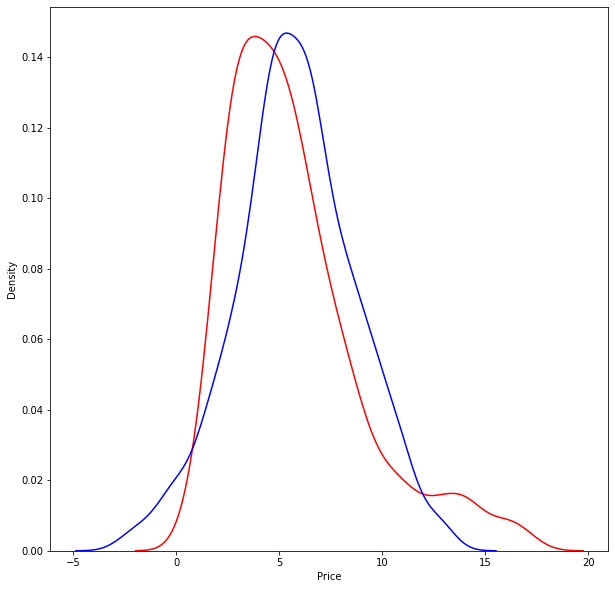

In [ ]:
plt.figure(figsize=(10,10))
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(y_prediction,hist=False,color="b")

In [ ]:
# simple linear regression
x = df[['Power']]
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
LR = LinearRegression()
LR.fit(x_train,y_train)

y_prediction =  LR.predict(x_test)

score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 socre is  0.3469465868269096
mean_sqrd_error is== 7.061699738910522
root_mean_squared error of is== 2.6573858844568514


slope [75.00008468]
intercept -49.5215262152964


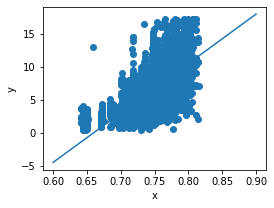

In [ ]:

c = LR.intercept_
m = LR.coef_

print('slope', m)
print('intercept', c)

x1 = 0.6
x2 = 0.9
y1 = m*x1 + c
y2 = m*x2 +c

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x,y)
ax.plot([x1, x2], [y1, y2])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## My Gradient Descent

In [ ]:
x = df['Power']
y = df['Price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
m = 0 # these could be random
c = 0 # these could be random
alpha = 0.01

count = 10000

def derivate_m(y_train, predictions, x_train):
  n = len(x_train)
  e = sum(x_train*(y_train - predictions))
  return -2/n*e 

def derivate_c(y_train, predictions, x_train):
  n = len(x_train)
  return (-2/n)*(sum(y_train-predictions))

for i in range(count):
  predictions = m*x_train + c

  m = m - alpha*(derivate_m(y_train, predictions, x_train))
  c = c - alpha*(derivate_c(y_train, predictions, x_train))


# training is done
print('slope:', m)
print('intercept:', c)

# testing

predictions = m*x_test + c
score=r2_score(y_test,predictions)

print('r2 score: ', score)



slope: 54.10112308083485
intercept: -34.08931785309247
r2 score:  0.3705215969603426


My gradient descent is having a slighlty better r2 score of 0.37 when compared to that of LR from SKlearn who had 0.34


but the training time is more



Also, the multiple linear regression is much better with a score of 0.68

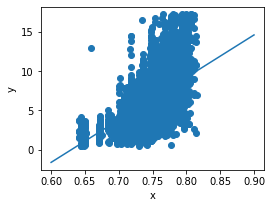

In [ ]:
x1 = 0.6
x2 = 0.9
y1 = m*x1 + c
y2 = m*x2 +c

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x,y)
ax.plot([x1, x2], [y1, y2])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## lasso and ridge regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge

x = df.drop('Price',axis=1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
predictions = model_lasso.predict(x_test)
print('r2 for lasso',r2_score(y_test, predictions))




model_ridge = Ridge(alpha=0.01)
model_ridge.fit(x_train, y_train)
predictions = model_ridge.predict(x_test)
print('r2 for ridge',r2_score(y_test, predictions))

r2 for lasso 0.6819856077693311
r2 for ridge 0.699843935825071


Both of these have similar performace that to of muliple linear regression


# Experiment 5

## Getting the data and other preprocessing steps

In [ ]:
# getting new classification data

# opening the file
data = pd.read_csv('shopping.csv')

# converting to ints and float
litt_int = [
    'Administrative',
    'Informational',
    'ProductRelated',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
]

for col in litt_int:
    data[col] = data[col].astype(int)


litt_float=[
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
]

for col in litt_float:
    data[col] = data[col].astype(float)


# converting bool to int
data['Weekend'] = data['Weekend'].astype(int)
data["Revenue"] = data['Revenue'].astype(int)


# ordinal label encoding
cols = {
    'VisitorType': {
        'Returning_Visitor': 1,
        'New_Visitor': 0,
        'Other': 0
    },
    'Month': {
        'Jan': 0,
        'Feb': 1,
        'Mar': 2,
        'Apr': 3,
        'May': 4,
        'June': 5,
        'Jul': 6,
        'Aug': 7,
        'Sep': 8,
        'Oct': 9,
        'Nov': 10,
        'Dec': 11
    }
}



data.replace(cols, inplace=True)
data["Month"] = data['Month'].astype(int)
data["VisitorType"] = data['VisitorType'].astype(int)

x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

TEST_SIZE = 0.4

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,1,1,0


## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logi = LogisticRegression(max_iter=10000)
logi.fit(x_train, y_train)
predictions = logi.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print(confusion_matrix(y_test, predictions))

sens = tp/(tp+fn)
spec = tn/(tn+fp)

print(f"True Positive Rate: ", 100*sens)
print(f"True Negative Rate: ", 100*spec)





[[4082   88]
 [ 508  254]]
True Positive Rate:  33.33333333333333
True Negative Rate:  97.88968824940048


In [ ]:
# calculating the roc and auc

from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.656


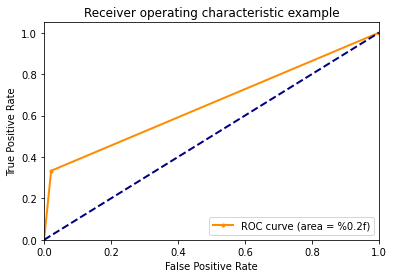

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# knearest approach
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

predictions = knn.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(confusion_matrix(y_test, predictions))

sens = tp/(tp+fn)
spec = tn/(tn+fp)

print("True Positive Rate: ", 100*sens)
print("True Negative Rate: ", 100*spec)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[[3790  380]
 [ 474  288]]
True Positive Rate:  37.79527559055118
True Negative Rate:  90.88729016786571


In [ ]:
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 0.643


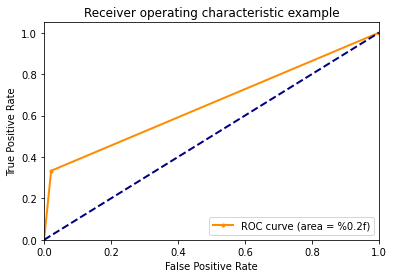

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Experiment 6

## Decision tree

In [ ]:
# importing libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.8596918085969181

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)
                
y_pred = clf_gini.predict(x_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 88.51040821843742


In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[2956  168]
 [ 257  318]]


In [ ]:
features=clf_entropy.feature_importances_
imp_features=features.argsort()[::-1][:5]
print(imp_features)

[ 8 10  6  0  7]


[Text(354.11538461538464, 475.65000000000003, 'X[8] <= 0.708\nentropy = 0.621\nsamples = 8631\nvalue = [7298, 1333]'),
 Text(128.76923076923077, 339.75, 'X[10] <= 4.5\nentropy = 0.237\nsamples = 6753\nvalue = [6490, 263]'),
 Text(64.38461538461539, 203.85000000000002, 'entropy = 0.0\nsamples = 3091\nvalue = [3091, 0]'),
 Text(193.15384615384616, 203.85000000000002, 'X[7] <= 0.076\nentropy = 0.373\nsamples = 3662\nvalue = [3399, 263]'),
 Text(128.76923076923077, 67.94999999999999, 'entropy = 0.41\nsamples = 3113\nvalue = [2857, 256]'),
 Text(257.53846153846155, 67.94999999999999, 'entropy = 0.099\nsamples = 549\nvalue = [542, 7]'),
 Text(579.4615384615385, 339.75, 'X[6] <= 0.0\nentropy = 0.986\nsamples = 1878\nvalue = [808, 1070]'),
 Text(450.69230769230774, 203.85000000000002, 'X[0] <= 4.5\nentropy = 0.826\nsamples = 852\nvalue = [221, 631]'),
 Text(386.3076923076923, 67.94999999999999, 'entropy = 0.659\nsamples = 609\nvalue = [104, 505]'),
 Text(515.0769230769231, 67.94999999999999, '

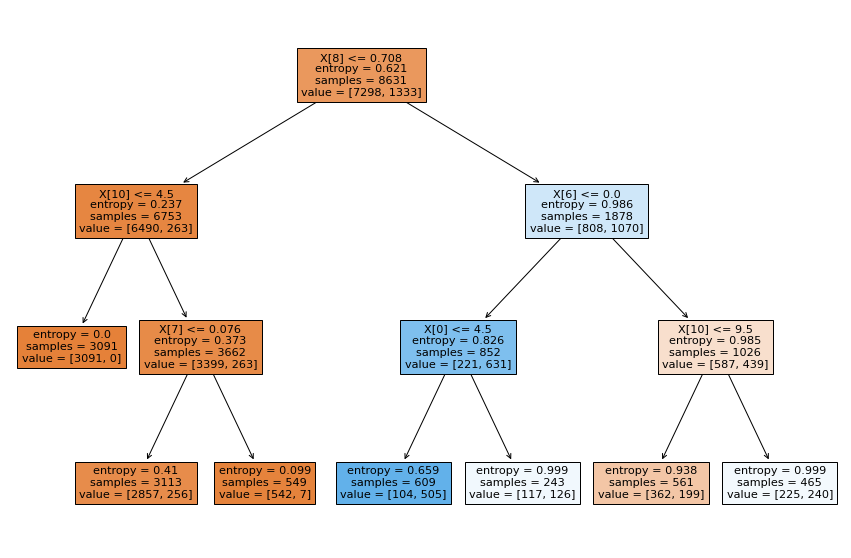

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print ("Accuracy is :", accuracy_score(y_test,pred)*100)

Accuracy is : 84.45525817788592


In [ ]:
results = confusion_matrix(y_test, pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[3124    0]
 [ 575    0]]


## ADA boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)
print ("Accuracy is :", accuracy_score(y_test,pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy is : 88.53744255204109


In [ ]:
results = confusion_matrix(y_test, pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[2963  161]
 [ 263  312]]
